# Selenium

## Instalación

https://github.com/amiune/freecodingtour/blob/main/cursos/espanol/web_scraping/selenium/Mercadona-Solucion.ipynb

In [1]:
!pip install selenium

In [10]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import csv
import time

# Configurar opciones para Selenium (ejecutar sin ventana)
chrome_options = Options()

# Path a tu ChromeDriver (ajusta el path a tu entorno)
s = Service('/usr/local/bin/chromedriver')

# Iniciar el navegador
driver = webdriver.Chrome(service=s, options=chrome_options)

In [11]:
titulos = []
precios = []
años = []
kms = []
tipos_gasolina = []
localizaciones = []
car_data = []

Ahora, vamos al navegador abierto y ejecutamos la página de manera manual

In [3]:
#driver.get("https://www.autocasion.com/coches-segunda-mano/peninsula-baleares?page=20")

A partir de aquí, ejecutaremos siempre desde aquí para ir obteniendo los datos de las distintas páginas que queramos

In [20]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [117]:
html = driver.page_source

In [118]:
soup = BeautifulSoup(html)

In [119]:
cars = soup.find_all('article', class_='anuncio')

for car in cars:
    try:
        # Extraer el título del coche
        title_element = car.find('h2', itemprop='name')
        title = title_element.text.strip() if title_element else 'Título no encontrado'
        titulos.append(title)

        # Extraer el precio
        price_element = car.find('p', class_='precio')
        price = price_element.text.strip().replace('.', '').replace('€', '').replace('\xa0', '').replace('Al contado', '').strip() if price_element else 'Precio no encontrado'
        precios.append(price)
            
        # Extraer los datos del ul con clase 'mt-CardAd-attr'
        attributes = car.find('ul')

        # Revisar si encontramos suficientes atributos
        if attributes:
            items = attributes.find_all('li')
            
            year = items[0].text.strip() if len(items) > 0 else 'Año no encontrado'
            años.append(year)
            
            fuel_type = items[1].text.strip() if len(items) > 1 else 'Combustible no encontrado'
            tipos_gasolina.append(fuel_type)
            
            km = items[2].text.strip().replace(' km', '').replace('.', '') if len(items) > 2 else 'Kilometraje no encontrado'
            kms.append(km)
            
            location = items[3].text.strip() if len(items) > 3 else 'Ubicación no encontrada'
            localizaciones.append(location)
        
        else:
            year, fuel_type, km, location = 'Año no encontrado', 'Combustible no encontrado', 'Kilometraje no encontrado', 'Ubicación no encontrada'
            años.append(None)
            tipos_gasolina.append(None)
            kms.append(None)
            localizaciones.append(None)


        # Añadir los datos del coche a la lista
        car_data.append([title, price, year, km, fuel_type, location])

    except Exception as e:
        print(f"Error procesando coche: {e}")
        continue

In [120]:
df = pd.DataFrame({"Title":titulos, "Precio":precios, "Año":años, "Km":kms, "Tipo Gasolina":tipos_gasolina, "Ubicación":localizaciones})

In [121]:
df

,Title,Precio,Año,Km,Tipo Gasolina,Ubicación
0,CITROEN C-Elysée 1.2 PureTech Feel 82,10900,2017,32700,Gasolina,Alicante
1,BMW Serie 3 325i Cabrio Aut.,19990,2011,77000,Gasolina,Alicante
2,TOYOTA Yaris Cross 120H Active Tech,24990,2024,6,Híbrido,Madrid
3,VOLKSWAGEN T-Roc 2.0TDI Advance DSG7,18690,2019,122007,Diésel,Madrid
4,PORSCHE 911 Carrera 4 GTS Cabriolet,197900,2022,7000,Gasolina,Valencia
...,...,...,...,...,...,...
283,LEXUS UX 2.0 250h Business,26989,2020,72720,Híbrido,Madrid
284,PEUGEOT 2008 1.2 PureTech S&S GT Line EAT8 130,19490,2020,49252,Gasolina,Madrid
285,HYUNDAI i10 1.0 MPI Klass,13625,2023,12684,Gasolina,Barcelona
286,LEXUS UX 2.0 250h Business,26990,2020,63690,Híbrido,Madrid


In [122]:
df.dropna()

,Title,Precio,Año,Km,Tipo Gasolina,Ubicación
0,CITROEN C-Elysée 1.2 PureTech Feel 82,10900,2017,32700,Gasolina,Alicante
1,BMW Serie 3 325i Cabrio Aut.,19990,2011,77000,Gasolina,Alicante
2,TOYOTA Yaris Cross 120H Active Tech,24990,2024,6,Híbrido,Madrid
3,VOLKSWAGEN T-Roc 2.0TDI Advance DSG7,18690,2019,122007,Diésel,Madrid
4,PORSCHE 911 Carrera 4 GTS Cabriolet,197900,2022,7000,Gasolina,Valencia
...,...,...,...,...,...,...
283,LEXUS UX 2.0 250h Business,26989,2020,72720,Híbrido,Madrid
284,PEUGEOT 2008 1.2 PureTech S&S GT Line EAT8 130,19490,2020,49252,Gasolina,Madrid
285,HYUNDAI i10 1.0 MPI Klass,13625,2023,12684,Gasolina,Barcelona
286,LEXUS UX 2.0 250h Business,26990,2020,63690,Híbrido,Madrid


In [123]:
df.to_csv("coches1.csv", index=False)

## WEB SCRAPING. Páginas 1 - 111 - MERCEDES-BENZ CLASE A

### Importaciones

In [13]:
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.options import Options
import csv
import time
from bs4 import BeautifulSoup
import pandas as pd

### Opciones Selenium e iniciamos navegador

In [14]:
# Configurar opciones para Selenium (ejecutar sin ventana)
firefox_options = Options()

# Path a tu ChromeDriver (ajusta el path a tu entorno)
s = Service('/usr/local/bin/geckodriver')

# Iniciar el navegador
driver = webdriver.Firefox(service=s, options=firefox_options)

### Preparamos Web Scrapping

Preparamos listas vacías para ir rellenando con los datos obtenidos y, posteriormente, crear el dataframe

In [15]:
titulos = []
precios = []
años = []
kms = []
tipos_gasolina = []
localizaciones = []

Bucle para recorrer de la página 1 a la 111 y recopilar datos

In [16]:
car_data = []

for page in range(1, 112):
    try:
        print(f"Scraping página {page}...")

        # Obtener la página actual
        URL = f"https://www.autocasion.com/coches-segunda-mano/mercedes-benz-clase-a-ocasion?page={page}"
        driver.get(URL)

        # Obtener el HTML de la página
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')

        cars = soup.find_all('article', class_='anuncio')

        for car in cars:
            try:
                # Extraer el título del coche
                title_element = car.find('h2', itemprop='name')
                title = title_element.text.strip() if title_element else 'Título no encontrado'
                titulos.append(title)
        
                # Extraer el precio
                price_element = car.find('p', class_='precio')
                price = price_element.text.strip().replace('.', '').replace('€', '').replace('\xa0', '').replace('Al contado', '').strip() if price_element else 'Precio no encontrado'
                precios.append(price)
                    
                # Extraer los datos del ul con clase 'mt-CardAd-attr'
                attributes = car.find('ul')
        
                # Revisar si encontramos suficientes atributos
                if attributes:
                    items = attributes.find_all('li')
                    
                    year = items[0].text.strip() if len(items) > 0 else 'Año no encontrado'
                    años.append(year)
                    
                    fuel_type = items[1].text.strip() if len(items) > 1 else 'Combustible no encontrado'
                    tipos_gasolina.append(fuel_type)
                    
                    km = items[2].text.strip().replace(' km', '').replace('.', '') if len(items) > 2 else 'Kilometraje no encontrado'
                    kms.append(km)
                    
                    location = items[3].text.strip() if len(items) > 3 else 'Ubicación no encontrada'
                    localizaciones.append(location)
                
                else:
                    year, fuel_type, km, location = 'Año no encontrado', 'Combustible no encontrado', 'Kilometraje no encontrado', 'Ubicación no encontrada'
                    años.append(None)
                    tipos_gasolina.append(None)
                    kms.append(None)
                    localizaciones.append(None)
        
        
                # Añadir los datos del coche a la lista
                car_data.append([title, price, year, km, fuel_type, location])
        
            except Exception as e:
                print(f"Error procesando coche: {e}")
                continue

    except Exception as e:
        print(f"Error procesando página {page}: {e}")
        continue

    finally:
        time.sleep(5)

Scraping página 1...
Scraping página 2...



KeyboardInterrupt



### Creamos dataframe y mostramos

In [143]:
df = pd.DataFrame({
    "Marca y modelo": titulos,
    "Año": años,
    "Km": kms,
    "Tipo Gasolina": tipos_gasolina,
    "Ubicación": localizaciones,
    "Precio": precios
})

In [144]:
df

,Marca y modelo,Año,Km,Tipo Gasolina,Ubicación,Precio
0,MERCEDES-BENZ Clase A 250 e Compacto,2024,0,Híbrido,Córdoba,45900
1,MERCEDES-BENZ Clase A 250 e Sedán,2024,13563,Híbrido,Madrid,37990
2,MERCEDES-BENZ Clase A 180 7G-DCT,2020,69026,Gasolina,Alicante,25990
3,MERCEDES-BENZ Clase A 45 S AMG Line Premium 4M...,2023,19365,Gasolina,Madrid,65990
4,MERCEDES-BENZ Clase A 250 e,2023,8056,Híbrido,Madrid,36990 \n ...
...,...,...,...,...,...,...
1769,MERCEDES-BENZ Clase A 250e 8G-DCT,2020,119000,Híbrido Enchufable,Barcelona,27900
1770,MERCEDES-BENZ Clase A 220 7G-DCT,2019,76000,Gasolina,Barcelona,32500
1771,MERCEDES-BENZ Clase A 200CDI BE AMG Line,2015,80500,Diésel,Madrid,18690
1772,MERCEDES-BENZ Clase A 250e 8G-DCT,2022,33025,Híbrido Enchufable,Madrid,32990


In [145]:
df.dropna()

,Marca y modelo,Año,Km,Tipo Gasolina,Ubicación,Precio
0,MERCEDES-BENZ Clase A 250 e Compacto,2024,0,Híbrido,Córdoba,45900
1,MERCEDES-BENZ Clase A 250 e Sedán,2024,13563,Híbrido,Madrid,37990
2,MERCEDES-BENZ Clase A 180 7G-DCT,2020,69026,Gasolina,Alicante,25990
3,MERCEDES-BENZ Clase A 45 S AMG Line Premium 4M...,2023,19365,Gasolina,Madrid,65990
4,MERCEDES-BENZ Clase A 250 e,2023,8056,Híbrido,Madrid,36990 \n ...
...,...,...,...,...,...,...
1769,MERCEDES-BENZ Clase A 250e 8G-DCT,2020,119000,Híbrido Enchufable,Barcelona,27900
1770,MERCEDES-BENZ Clase A 220 7G-DCT,2019,76000,Gasolina,Barcelona,32500
1771,MERCEDES-BENZ Clase A 200CDI BE AMG Line,2015,80500,Diésel,Madrid,18690
1772,MERCEDES-BENZ Clase A 250e 8G-DCT,2022,33025,Híbrido Enchufable,Madrid,32990


In [146]:
df.to_csv("mercedes_benz_clase_a.csv", index=False)

# Estudio datos

## Importamos librerías

In [2]:
import pandas as pd
import numpy as np

## Carga y limpieza de datos

### Cargamos datos

In [3]:
df = pd.read_csv("mercedes_benz_clase_a.csv")

In [4]:
df

,Marca y modelo,Año,Km,Tipo Gasolina,Ubicación,Precio
0,MERCEDES-BENZ Clase A 250 e Compacto,2024,0,Híbrido,Córdoba,45900
1,MERCEDES-BENZ Clase A 250 e Sedán,2024,13563,Híbrido,Madrid,37990
2,MERCEDES-BENZ Clase A 180 7G-DCT,2020,69026,Gasolina,Alicante,25990
3,MERCEDES-BENZ Clase A 45 S AMG Line Premium 4M...,2023,19365,Gasolina,Madrid,65990
4,MERCEDES-BENZ Clase A 250 e,2023,8056,Híbrido,Madrid,36990 \n ...
...,...,...,...,...,...,...
1769,MERCEDES-BENZ Clase A 250e 8G-DCT,2020,119000,Híbrido Enchufable,Barcelona,27900
1770,MERCEDES-BENZ Clase A 220 7G-DCT,2019,76000,Gasolina,Barcelona,32500
1771,MERCEDES-BENZ Clase A 200CDI BE AMG Line,2015,80500,Diésel,Madrid,18690
1772,MERCEDES-BENZ Clase A 250e 8G-DCT,2022,33025,Híbrido Enchufable,Madrid,32990


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Marca y modelo  1774 non-null   object
 1   Año             1774 non-null   object
 2   Km              1774 non-null   object
 3   Tipo Gasolina   1774 non-null   object
 4   Ubicación       1774 non-null   object
 5   Precio          1774 non-null   object
dtypes: object(6)
memory usage: 83.3+ KB


In [6]:
df.head()

,Marca y modelo,Año,Km,Tipo Gasolina,Ubicación,Precio
0,MERCEDES-BENZ Clase A 250 e Compacto,2024,0,Híbrido,Córdoba,45900
1,MERCEDES-BENZ Clase A 250 e Sedán,2024,13563,Híbrido,Madrid,37990
2,MERCEDES-BENZ Clase A 180 7G-DCT,2020,69026,Gasolina,Alicante,25990
3,MERCEDES-BENZ Clase A 45 S AMG Line Premium 4M...,2023,19365,Gasolina,Madrid,65990
4,MERCEDES-BENZ Clase A 250 e,2023,8056,Híbrido,Madrid,36990 \n ...


### Columna Precio

Como observamos, en la columna precio hay algunos valores que, tras hacer web scraping, detecta como un porcentaje de descuento. El valor aparece tal que así: 36990 /n-3%, lo que haría referencia en la carta del producto que tendría un descuento adicional del 3% sobre el precio que marca. Pero el precio real es el que aparece al comienzo, por tanto, procedemos a *eliminar todo lo que se encuentra después*.

In [7]:
df['Precio'] = df['Precio'].str.replace(r'\n', '', regex=True).str.replace(r' ', '', regex=True).str.replace(r'€', '', regex=True).str.strip()

In [8]:
df

,Marca y modelo,Año,Km,Tipo Gasolina,Ubicación,Precio
0,MERCEDES-BENZ Clase A 250 e Compacto,2024,0,Híbrido,Córdoba,45900
1,MERCEDES-BENZ Clase A 250 e Sedán,2024,13563,Híbrido,Madrid,37990
2,MERCEDES-BENZ Clase A 180 7G-DCT,2020,69026,Gasolina,Alicante,25990
3,MERCEDES-BENZ Clase A 45 S AMG Line Premium 4M...,2023,19365,Gasolina,Madrid,65990
4,MERCEDES-BENZ Clase A 250 e,2023,8056,Híbrido,Madrid,36990-3%
...,...,...,...,...,...,...
1769,MERCEDES-BENZ Clase A 250e 8G-DCT,2020,119000,Híbrido Enchufable,Barcelona,27900
1770,MERCEDES-BENZ Clase A 220 7G-DCT,2019,76000,Gasolina,Barcelona,32500
1771,MERCEDES-BENZ Clase A 200CDI BE AMG Line,2015,80500,Diésel,Madrid,18690
1772,MERCEDES-BENZ Clase A 250e 8G-DCT,2022,33025,Híbrido Enchufable,Madrid,32990


Hasta aquí, hemos conseguido eliminar el salto de linea y ahora tenemos algo tal que así: 36990-3%, solo nos quedaría detectar el "-" y eliminarlo junto con todo lo que le siga

In [9]:
df.iloc[4,:]

Marca y modelo    MERCEDES-BENZ Clase A 250 e
Año                                      2023
Km                                       8056
Tipo Gasolina                         Híbrido
Ubicación                              Madrid
Precio                               36990-3%
Name: 4, dtype: object

In [10]:
df['Precio'] = df['Precio'].str.replace(r'-.*', '', regex=True)

In [11]:
df.iloc[4,:]

Marca y modelo    MERCEDES-BENZ Clase A 250 e
Año                                      2023
Km                                       8056
Tipo Gasolina                         Híbrido
Ubicación                              Madrid
Precio                                  36990
Name: 4, dtype: object

### Columnas Erróneas

Hay algunas columnas que después de hacer web scraping no ha pillado bien los datos y, por tanto, están todos descolocados. Son mínimas, por tanto optamos por no complicarnos y estudiar el encontrarlas para eliminarlas. Un ejemplo, la que se muestra a continuación:

In [12]:
df.iloc[99,:]

Marca y modelo    MERCEDES-BENZ Clase A 45 AMG 4Matic 7G-DCT
Año                                                   Oferta
Km                                                  Gasolina
Tipo Gasolina                                           2016
Ubicación                                         127.000 km
Precio                                                 36999
Name: 99, dtype: object

Lo que se va a hacer es, que de la columna año, como tienen que ser 4 valores numéricos (2022 o 2005, por ejemplo), lo verifique y si no lo cumple que borre toda la fila

Vemos que filas tienen en el año un dato formado por cuatro número y mostramos. Como se puede observar, son 1735 columnas las que tendrían valores correctos, teniendo en el dataframe inicial un total de 1774. Como vemos, son mínimas y procedemos a eliminarlas

In [13]:
df[df['Año'].str.match(r'^\d{4}$')]

,Marca y modelo,Año,Km,Tipo Gasolina,Ubicación,Precio
0,MERCEDES-BENZ Clase A 250 e Compacto,2024,0,Híbrido,Córdoba,45900
1,MERCEDES-BENZ Clase A 250 e Sedán,2024,13563,Híbrido,Madrid,37990
2,MERCEDES-BENZ Clase A 180 7G-DCT,2020,69026,Gasolina,Alicante,25990
3,MERCEDES-BENZ Clase A 45 S AMG Line Premium 4M...,2023,19365,Gasolina,Madrid,65990
4,MERCEDES-BENZ Clase A 250 e,2023,8056,Híbrido,Madrid,36990
...,...,...,...,...,...,...
1769,MERCEDES-BENZ Clase A 250e 8G-DCT,2020,119000,Híbrido Enchufable,Barcelona,27900
1770,MERCEDES-BENZ Clase A 220 7G-DCT,2019,76000,Gasolina,Barcelona,32500
1771,MERCEDES-BENZ Clase A 200CDI BE AMG Line,2015,80500,Diésel,Madrid,18690
1772,MERCEDES-BENZ Clase A 250e 8G-DCT,2022,33025,Híbrido Enchufable,Madrid,32990


In [14]:
df = df[df['Año'].str.match(r'^\d{4}$')]

In [15]:
df

,Marca y modelo,Año,Km,Tipo Gasolina,Ubicación,Precio
0,MERCEDES-BENZ Clase A 250 e Compacto,2024,0,Híbrido,Córdoba,45900
1,MERCEDES-BENZ Clase A 250 e Sedán,2024,13563,Híbrido,Madrid,37990
2,MERCEDES-BENZ Clase A 180 7G-DCT,2020,69026,Gasolina,Alicante,25990
3,MERCEDES-BENZ Clase A 45 S AMG Line Premium 4M...,2023,19365,Gasolina,Madrid,65990
4,MERCEDES-BENZ Clase A 250 e,2023,8056,Híbrido,Madrid,36990
...,...,...,...,...,...,...
1769,MERCEDES-BENZ Clase A 250e 8G-DCT,2020,119000,Híbrido Enchufable,Barcelona,27900
1770,MERCEDES-BENZ Clase A 220 7G-DCT,2019,76000,Gasolina,Barcelona,32500
1771,MERCEDES-BENZ Clase A 200CDI BE AMG Line,2015,80500,Diésel,Madrid,18690
1772,MERCEDES-BENZ Clase A 250e 8G-DCT,2022,33025,Híbrido Enchufable,Madrid,32990


Además, podemos observar que hay dos filas (1412 y 1277) que tienen valores erróneos en Precio y Km, procedemos a eliminarlas también

In [16]:
non_numeric_precio = df[~df['Precio'].astype(str).str.isnumeric()]
print(non_numeric_precio)

                                         Marca y modelo   Año      Km  \
1412  MERCEDES-BENZ Clase A 2.0 220 190 7G-DCT AUTOM...  2019  148000   

     Tipo Gasolina  Ubicación     Precio  
1412      Gasolina  Barcelona  Consultar  


In [17]:
non_numeric_precio

,Marca y modelo,Año,Km,Tipo Gasolina,Ubicación,Precio
1412,MERCEDES-BENZ Clase A 2.0 220 190 7G-DCT AUTOM...,2019,148000,Gasolina,Barcelona,Consultar


In [18]:
df = df[df['Precio'].astype(str).str.isnumeric()]

In [19]:
non_numeric_km = df[~df['Km'].astype(str).str.isnumeric()]
print(non_numeric_km)

                                         Marca y modelo   Año      Km  \
1277  MERCEDES-BENZ Clase A Hibrido Enchufable Auto ...  2020  Madrid   

     Tipo Gasolina                Ubicación Precio  
1277     74.066 km  Ubicación no encontrada  26350  


In [20]:
non_numeric_km

,Marca y modelo,Año,Km,Tipo Gasolina,Ubicación,Precio
1277,MERCEDES-BENZ Clase A Hibrido Enchufable Auto ...,2020,Madrid,74.066 km,Ubicación no encontrada,26350


In [21]:
df = df[df['Km'].astype(str).str.isnumeric()]

### Columna Marca y modelo

Como observamos, la columna Marca y Modelo posee la misma información al comienzo: MERCEDES-BENZ Clase A, y lo que realmente toma importancia es la potencia del motor (180, 200, 220, etc) y el tipo de vehículo (Sedán, Compacto, etc). Para ello, vamos a dividir en tres columnas:
- Marca y modelo: MERCEDES-BENZ Clase A
- Potencia motor: 180
- Tipo de vehículo: Sedán

Vamos a obviar valores como "d" o "e" que aparecen seguidos de la potencia del vehículo ya que ese dato nos indica:
- d: si el motor es diésel
- e: si el motor es eléctrico

Para esos datos, ya tenemos una columna que indica tipo de gasolina que posee el vehículo y por tanto es irrelevante

In [26]:
def dividir_marca_modelo(valor):
    marca = 'MERCEDES-BENZ Clase A'
    
    potencia = None
    tipo_vehiculo = None
    
    # Dividir el texto en palabras
    partes = valor.split()
    for i, parte in enumerate(partes):
        if parte[:3].isdigit() and len(parte) >= 3:
            potencia = parte[:3]
        
        # Extraer palabras clave para el tipo de vehículo
        if parte.lower() in ['sedán', 'compacto']:
            tipo_vehiculo = parte.capitalize()

    # Retornar None si no se encuentra el tipo de vehículo
    return pd.Series([marca, potencia, tipo_vehiculo])

In [27]:
df[['Marca', 'Potencia', 'Tipo de vehículo']] = df['Marca y modelo'].apply(dividir_marca_modelo)

In [28]:
df

,Marca y modelo,Año,Km,Tipo Gasolina,Ubicación,Precio,Marca,Potencia,Tipo de vehículo
0,MERCEDES-BENZ Clase A 250 e Compacto,2024,0,Híbrido,Córdoba,45900,MERCEDES-BENZ Clase A,250,Compacto
1,MERCEDES-BENZ Clase A 250 e Sedán,2024,13563,Híbrido,Madrid,37990,MERCEDES-BENZ Clase A,250,Sedán
2,MERCEDES-BENZ Clase A 180 7G-DCT,2020,69026,Gasolina,Alicante,25990,MERCEDES-BENZ Clase A,180,None
3,MERCEDES-BENZ Clase A 45 S AMG Line Premium 4M...,2023,19365,Gasolina,Madrid,65990,MERCEDES-BENZ Clase A,None,None
4,MERCEDES-BENZ Clase A 250 e,2023,8056,Híbrido,Madrid,36990,MERCEDES-BENZ Clase A,250,None
...,...,...,...,...,...,...,...,...,...
1769,MERCEDES-BENZ Clase A 250e 8G-DCT,2020,119000,Híbrido Enchufable,Barcelona,27900,MERCEDES-BENZ Clase A,250,None
1770,MERCEDES-BENZ Clase A 220 7G-DCT,2019,76000,Gasolina,Barcelona,32500,MERCEDES-BENZ Clase A,220,None
1771,MERCEDES-BENZ Clase A 200CDI BE AMG Line,2015,80500,Diésel,Madrid,18690,MERCEDES-BENZ Clase A,200,None
1772,MERCEDES-BENZ Clase A 250e 8G-DCT,2022,33025,Híbrido Enchufable,Madrid,32990,MERCEDES-BENZ Clase A,250,None


In [32]:
df.isnull().sum()

Marca y modelo         0
Año                    0
Km                     0
Tipo Gasolina          0
Ubicación              0
Precio                 0
Marca                  0
Potencia             162
Tipo de vehículo    1493
dtype: int64

Como se puede observar, hay 162 vehículos que el valor de potencia aparece como "None" y, por tanto, vamos a eliminarlos

In [37]:
# Eliminamos filas donde potencia sea nulo
df = df.dropna(subset=['Potencia'])

# Eliminamos la columna marca y modelo
df = df.drop(columns=['Marca y modelo'])

# Reordenamos columnas
columnas_nuevas = ['Marca', 'Potencia', 'Tipo de vehículo'] + [col for col in df.columns if col not in ['Marca', 'Potencia', 'Tipo de vehículo']]
df = df[columnas_nuevas]

In [38]:
df

,Marca,Potencia,Tipo de vehículo,Año,Km,Tipo Gasolina,Ubicación,Precio
0,MERCEDES-BENZ Clase A,250,Compacto,2024,0,Híbrido,Córdoba,45900
1,MERCEDES-BENZ Clase A,250,Sedán,2024,13563,Híbrido,Madrid,37990
2,MERCEDES-BENZ Clase A,180,None,2020,69026,Gasolina,Alicante,25990
4,MERCEDES-BENZ Clase A,250,None,2023,8056,Híbrido,Madrid,36990
5,MERCEDES-BENZ Clase A,200,None,2023,14223,Diésel,Lugo,36500
...,...,...,...,...,...,...,...,...
1769,MERCEDES-BENZ Clase A,250,None,2020,119000,Híbrido Enchufable,Barcelona,27900
1770,MERCEDES-BENZ Clase A,220,None,2019,76000,Gasolina,Barcelona,32500
1771,MERCEDES-BENZ Clase A,200,None,2015,80500,Diésel,Madrid,18690
1772,MERCEDES-BENZ Clase A,250,None,2022,33025,Híbrido Enchufable,Madrid,32990


In [39]:
df.to_csv("revisar.csv", index=False)

### Dtypes y finalizamos configuración dataset

Observamos que todos los valores que tenemos son objetos. Transformamos los valores año, km y precio a int

In [40]:
df.dtypes

Marca               object
Potencia            object
Tipo de vehículo    object
Año                 object
Km                  object
Tipo Gasolina       object
Ubicación           object
Precio              object
dtype: object

In [41]:
df['Potencia'] = df['Potencia'].astype(int)
df['Año'] = df['Año'].astype(int)
df['Km'] = df['Km'].astype(int)
df['Precio'] = df['Precio'].astype(int)

In [42]:
df.dtypes

Marca               object
Potencia             int64
Tipo de vehículo    object
Año                  int64
Km                   int64
Tipo Gasolina       object
Ubicación           object
Precio               int64
dtype: object

### Creamos csv para guardar

Para finalizar la limpieza, guardamos el dataframe en un csv

In [43]:
df.to_csv("final_mercedes_benz_clase_a.csv", index=False)

# Modelo ML

## Carga de datos

Cargamos dataframe final con todos los datos de manera correcta

In [1]:
import pandas as pd
df = pd.read_csv('final_mercedes_benz_clase_a.csv')
df

,Marca,Potencia,Tipo de vehículo,Año,Km,Tipo Gasolina,Ubicación,Precio
0,MERCEDES-BENZ Clase A,250,Compacto,2024,0,Híbrido,Córdoba,45900
1,MERCEDES-BENZ Clase A,250,Sedán,2024,13563,Híbrido,Madrid,37990
2,MERCEDES-BENZ Clase A,180,NaN,2020,69026,Gasolina,Alicante,25990
3,MERCEDES-BENZ Clase A,250,NaN,2023,8056,Híbrido,Madrid,36990
4,MERCEDES-BENZ Clase A,200,NaN,2023,14223,Diésel,Lugo,36500
...,...,...,...,...,...,...,...,...
1566,MERCEDES-BENZ Clase A,250,NaN,2020,119000,Híbrido Enchufable,Barcelona,27900
1567,MERCEDES-BENZ Clase A,220,NaN,2019,76000,Gasolina,Barcelona,32500
1568,MERCEDES-BENZ Clase A,200,NaN,2015,80500,Diésel,Madrid,18690
1569,MERCEDES-BENZ Clase A,250,NaN,2022,33025,Híbrido Enchufable,Madrid,32990


## Preparación dataframe para modelos

In [99]:
df2 = pd.get_dummies(df, columns=["Potencia", "Tipo de vehículo", "Tipo Gasolina", "Ubicación"])
df2

,Marca,Año,Km,Precio,Potencia_100,Potencia_102,Potencia_105,Potencia_108,Potencia_109,Potencia_110,...,Ubicación_Salamanca,Ubicación_Sevilla,Ubicación_Soria,Ubicación_Tarragona,Ubicación_Toledo,Ubicación_Valencia,Ubicación_Valladolid,Ubicación_Vizcaya,Ubicación_Zamora,Ubicación_Zaragoza
0,MERCEDES-BENZ Clase A,2024,0,45900,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,MERCEDES-BENZ Clase A,2024,13563,37990,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,MERCEDES-BENZ Clase A,2020,69026,25990,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,MERCEDES-BENZ Clase A,2023,8056,36990,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,MERCEDES-BENZ Clase A,2023,14223,36500,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,MERCEDES-BENZ Clase A,2020,119000,27900,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1567,MERCEDES-BENZ Clase A,2019,76000,32500,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1568,MERCEDES-BENZ Clase A,2015,80500,18690,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1569,MERCEDES-BENZ Clase A,2022,33025,32990,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [100]:
df2.iloc[0]

Marca                   MERCEDES-BENZ Clase A
Año                                      2024
Km                                          0
Precio                                  45900
Potencia_100                            False
                                ...          
Ubicación_Valencia                      False
Ubicación_Valladolid                    False
Ubicación_Vizcaya                       False
Ubicación_Zamora                        False
Ubicación_Zaragoza                      False
Name: 0, Length: 82, dtype: object

In [101]:
df2 = df2.drop(columns=["Marca"])
df2

,Año,Km,Precio,Potencia_100,Potencia_102,Potencia_105,Potencia_108,Potencia_109,Potencia_110,Potencia_115,...,Ubicación_Salamanca,Ubicación_Sevilla,Ubicación_Soria,Ubicación_Tarragona,Ubicación_Toledo,Ubicación_Valencia,Ubicación_Valladolid,Ubicación_Vizcaya,Ubicación_Zamora,Ubicación_Zaragoza
0,2024,0,45900,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2024,13563,37990,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2020,69026,25990,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2023,8056,36990,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2023,14223,36500,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,2020,119000,27900,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1567,2019,76000,32500,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1568,2015,80500,18690,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1569,2022,33025,32990,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Gradient Boosting Regressor - MEJOR RESULTADO PREDICCIÓN

### Train y test

In [102]:
from sklearn.model_selection import train_test_split

En test_size vamos a darle una dimensión del 20%. Procedemos entonces a dividir el dataset en train y test para comenzar a entrenarlo

In [103]:
df_train, df_test = train_test_split(df2, test_size=0.20, random_state=42)

In [104]:
df_train

,Año,Km,Precio,Potencia_100,Potencia_102,Potencia_105,Potencia_108,Potencia_109,Potencia_110,Potencia_115,...,Ubicación_Salamanca,Ubicación_Sevilla,Ubicación_Soria,Ubicación_Tarragona,Ubicación_Toledo,Ubicación_Valencia,Ubicación_Valladolid,Ubicación_Vizcaya,Ubicación_Zamora,Ubicación_Zaragoza
650,2019,54998,23490,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1313,2013,129360,13850,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1513,2021,85000,23000,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
381,2016,93500,20490,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1088,2023,10341,31990,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,2004,198000,3499,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1294,2010,180000,5600,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
860,2023,22949,32990,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1459,2019,96000,26490,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [105]:
df_test

,Año,Km,Precio,Potencia_100,Potencia_102,Potencia_105,Potencia_108,Potencia_109,Potencia_110,Potencia_115,...,Ubicación_Salamanca,Ubicación_Sevilla,Ubicación_Soria,Ubicación_Tarragona,Ubicación_Toledo,Ubicación_Valencia,Ubicación_Valladolid,Ubicación_Vizcaya,Ubicación_Zamora,Ubicación_Zaragoza
1196,2023,19189,34900,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
626,2023,16547,32490,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
941,2020,68937,36990,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1309,2019,68640,25900,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
259,2020,148269,24490,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2016,74000,28490,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1221,2020,74000,32500,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1079,2017,135415,15870,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1552,2021,73000,25990,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Entrenamiento Caja Negra

Es hora entonces de entrenar nuestra caja negra utilizando el dataframe de train. Una vez la tengamos entrenada, usaremos la misma para predecir valores que nunca ha visto previamente

In [106]:
exclude_columns = ['Precio']

X_train = df_train.loc[:, ~df_train.columns.isin(exclude_columns)]
y_train = df_train.loc[:, "Precio"]

X_test = df_test.loc[:, ~df_test.columns.isin(exclude_columns)]
y_test = df_test.loc[:, "Precio"]

#### Función RMSE - Mean Squared Error

In [107]:
from sklearn.metrics import mean_squared_error
import numpy as np

def calcular_rmse_train_val(clf, X_train, y_train, X_val, y_val):
    # Predecir en el conjunto de entrenamiento
    y_train_pred = clf.predict(X_train)
    # Calcular RMSE para el conjunto de entrenamiento
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    print("Entrenamiento RMSE:", rmse_train)

    # Predecir en el conjunto de validación
    y_val_pred = clf.predict(X_val)
    # Calcular RMSE para el conjunto de validación
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    print("Validación RMSE:", rmse_val)

    return rmse_train, rmse_val

In [108]:
from sklearn.ensemble import GradientBoostingRegressor

mis_parametros_a_probar = {
    'loss': ['squared_error', 'huber'],  # Mejores opciones para regresión
    'learning_rate': [0.01, 0.05, 0.1],  # Tasa de aprendizaje más fina
    'n_estimators': [100, 200],  # Número de estimadores para ajuste de precisión
    'subsample': [0.8, 1.0],  # Probar con y sin fraccionamiento
    'min_samples_split': [2, 10],  # Control de tamaño de partición
    'min_samples_leaf': [1, 5],  # Control de tamaño mínimo de hoja
    'max_depth': [3, 5, None],  # Controlar la profundidad de los árboles
    'max_features': ['sqrt', 'log2'],  # Para explorar qué características usar
    'validation_fraction': [0.1],  # Para early stopping
    'n_iter_no_change': [5, 10],  # Iteraciones sin cambios antes de parar
    'random_state': [42],  # Reproducibilidad
}

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(
    estimator=GradientBoostingRegressor(),
    param_grid=mis_parametros_a_probar,
    cv=5,
    n_jobs=-1,  # Usar múltiples núcleos
    scoring='neg_root_mean_squared_error'  # Usar RMSE negativo como scoring
)
cv.fit(X_train, y_train)
cv.best_params_

{'learning_rate': 0.1,
 'loss': 'huber',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 200,
 'n_iter_no_change': 10,
 'random_state': 42,
 'subsample': 0.8,
 'validation_fraction': 0.1}

{'learning_rate': 0.1,
 'loss': 'huber',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 200,
 'n_iter_no_change': 10,
 'random_state': 42,
 'subsample': 0.8,
 'validation_fraction': 0.1}

### Validación

In [109]:
clf = GradientBoostingRegressor(
    learning_rate=0.1,
    loss='huber',
    max_depth=5,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=200,
    n_iter_no_change=10,
    random_state=42,
    subsample=0.8,
    validation_fraction=0.1
)
clf.fit(X_train, y_train)

calcular_rmse_train_val(clf, X_train, y_train, X_test, y_test)

Entrenamiento RMSE: 2177.7509736878824
Validación RMSE: 2435.121351887311


(2177.7509736878824, 2435.121351887311)

#### Guardamos el modelo

Guardamos el modelo para utilizarlo posteriormente en Gradio

In [110]:
import joblib
joblib.dump(clf, "modelo_gradient_boosting.pkl")

['modelo_gradient_boosting.pkl']

### Probamos con test

In [117]:
df_test

,Año,Km,Precio,Potencia_100,Potencia_102,Potencia_105,Potencia_108,Potencia_109,Potencia_110,Potencia_115,...,Ubicación_Salamanca,Ubicación_Sevilla,Ubicación_Soria,Ubicación_Tarragona,Ubicación_Toledo,Ubicación_Valencia,Ubicación_Valladolid,Ubicación_Vizcaya,Ubicación_Zamora,Ubicación_Zaragoza
1196,2023,19189,34900,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
626,2023,16547,32490,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
941,2020,68937,36990,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1309,2019,68640,25900,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
259,2020,148269,24490,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2016,74000,28490,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1221,2020,74000,32500,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1079,2017,135415,15870,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1552,2021,73000,25990,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Guardamos los valores de precio en test en una variable para hacer luego la comparación

In [118]:
precio_real_test = df_test["Precio"]

Eliminamos la columna precio para hacer la predicción

In [119]:
df_test = df_test.drop("Precio", axis=1)
df_test

,Año,Km,Potencia_100,Potencia_102,Potencia_105,Potencia_108,Potencia_109,Potencia_110,Potencia_115,Potencia_116,...,Ubicación_Salamanca,Ubicación_Sevilla,Ubicación_Soria,Ubicación_Tarragona,Ubicación_Toledo,Ubicación_Valencia,Ubicación_Valladolid,Ubicación_Vizcaya,Ubicación_Zamora,Ubicación_Zaragoza
1196,2023,19189,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
626,2023,16547,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
941,2020,68937,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1309,2019,68640,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
259,2020,148269,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2016,74000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1221,2020,74000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1079,2017,135415,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1552,2021,73000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [120]:
prediccion = clf.predict(df_test)

Después de predecir, mostramos un dataframe con la comparación entre precio real y el predicho

In [121]:
df_resultado = pd.DataFrame({
    'Precio Real': precio_real_test,
    'Prediccion': prediccion
})

df_resultado.head(10)

,Precio Real,Prediccion
1196,34900,34434.343055
626,32490,32487.082004
941,36990,29228.856362
1309,25900,24501.956939
259,24490,23770.715200
1165,27991,30218.663722
32,26500,24520.530665
342,27900,24380.190486
1540,26695,27673.109263
588,34990,33298.043903


## Interfaz Gráfica - GRADIO

#### Instalación

In [43]:
!pip install gradio

#### Importamos librerías

In [175]:
import gradio as gr
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import numpy as np

#### Cargamos modelo y datos

In [112]:
model = joblib.load("modelo_gradient_boosting.pkl")
df = pd.read_csv('final_mercedes_benz_clase_a.csv')

Obtenemos las opciones únicas para cada característica

In [113]:
df['Tipo de vehículo'].fillna('Desconocido', inplace=True)

potencia_options = sorted(df['Potencia'].unique())
tipo_vehiculo_options = sorted(df['Tipo de vehículo'].unique())
tipo_gasolina_options = sorted(df['Tipo Gasolina'].unique())
ubicacion_options = sorted(df['Ubicación'].unique())
año_options = sorted(df['Año'].unique())

#### Función para predecir

In [94]:
# Definir las columnas de entrada esperadas por el modelo
expected_columns = [
    'Año', 'Km', 'Potencia_100', 'Potencia_102', 'Potencia_105', 'Potencia_108',
    'Potencia_109', 'Potencia_110', 'Potencia_115', 'Potencia_116', 'Potencia_120',
    'Potencia_122', 'Potencia_135', 'Potencia_136', 'Potencia_140', 'Potencia_150',
    'Potencia_160', 'Potencia_163', 'Potencia_165', 'Potencia_170', 'Potencia_175',
    'Potencia_180', 'Potencia_190', 'Potencia_200', 'Potencia_218', 'Potencia_220',
    'Potencia_250', 'Potencia_305', 'Potencia_360', 'Potencia_380', 'Potencia_420',
    'Potencia_421', 'Tipo de vehículo_Compacto', 'Tipo de vehículo_Desconocido',
    'Tipo de vehículo_Sedán', 'Tipo Gasolina_Diésel', 'Tipo Gasolina_Gasolina',
    'Tipo Gasolina_Híbrido', 'Tipo Gasolina_Híbrido Enchufable', 'Ubicación_Albacete',
    'Ubicación_Alicante', 'Ubicación_Almería', 'Ubicación_Asturias', 'Ubicación_Badajoz',
    'Ubicación_Barcelona', 'Ubicación_Burgos', 'Ubicación_Cantabria', 'Ubicación_Castellón',
    'Ubicación_Ciudad Real', 'Ubicación_Cáceres', 'Ubicación_Cádiz', 'Ubicación_Córdoba',
    'Ubicación_Girona', 'Ubicación_Granada', 'Ubicación_Guipúzcoa', 'Ubicación_Huelva',
    'Ubicación_Huesca', 'Ubicación_Islas Baleares', 'Ubicación_Jaén', 'Ubicación_La Coruña',
    'Ubicación_La Rioja', 'Ubicación_León', 'Ubicación_Lleida', 'Ubicación_Lugo',
    'Ubicación_Madrid', 'Ubicación_Murcia', 'Ubicación_Málaga', 'Ubicación_Navarra',
    'Ubicación_Orense', 'Ubicación_Pontevedra', 'Ubicación_Salamanca', 'Ubicación_Sevilla',
    'Ubicación_Soria', 'Ubicación_Tarragona', 'Ubicación_Toledo', 'Ubicación_Valencia',
    'Ubicación_Valladolid', 'Ubicación_Vizcaya', 'Ubicación_Zamora', 'Ubicación_Zaragoza'
]

In [186]:
def predecir_precio(potencia, tipo_vehiculo, año, km, tipo_gasolina, ubicacion):

    model = joblib.load("modelo_gradient_boosting.pkl")
    
    # Crear un DataFrame con los datos ingresados
    entrada = pd.DataFrame({
        'Año': [año],
        'Km': [km],
        'Potencia': [potencia],
        'Tipo de vehículo': [tipo_vehiculo],
        'Tipo Gasolina': [tipo_gasolina],
        'Ubicación': [ubicacion]
    })

    # Crear variables dummy solo de las columnas específicas
    entrada = pd.get_dummies(entrada, columns=["Potencia", "Tipo de vehículo", "Tipo Gasolina", "Ubicación"])

    # Asegurar que todas las columnas coincidan con el modelo (agregar columnas faltantes)
    for col in expected_columns:
        if col not in entrada.columns:
            entrada[col] = 0
    
    # Reordenar columnas según el orden esperado por el modelo
    entrada = entrada[expected_columns]

    # Realizar la predicción
    precio_predicho = model.predict(entrada)[0]

    # Generar datos para el gráfico de kilometraje
    kilometros = [5, 1000, 20000, 50000, 100000, 150000, 200000, 500000]
    precios = []
    
    for k in kilometros:
        # Simular entrada para calcular precios con diferentes kilometrajes
        sim_entrada = entrada.copy()
        sim_entrada['Km'] = k  # Cambiar el kilometraje
        precio = model.predict(sim_entrada)[0]
        precios.append(precio)

    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(kilometros, precios, marker='o', label='Precio estimado por kilometraje')
    plt.axhline(y=precio_predicho, color='red', linestyle='--', label='Tu coche: €{:.2f}'.format(precio_predicho))
    plt.title('Comparación de Precios por Kilometraje')
    plt.xlabel('Kilometraje (Km)')
    plt.ylabel('Precio (€)')
    plt.legend()
    plt.grid(True)
    plt.savefig("grafico_comparacion.png")
    plt.close()  # Cerrar la figura para liberar memoria

    return f"El precio estimado para el modelo seleccionado es: €{precio_predicho:,.2f}", "grafico_comparacion.png"

In [187]:
predecir_precio("180", 'Sedán', "2020", "86000", "Diésel", "Ciudad Real")

('El precio estimado para el modelo seleccionado es: €24,520.53',
 'grafico_comparacion.png')

#### Interfaz de usuario

In [188]:
with gr.Blocks() as interfaz:
    gr.Image("https://brandemia.org/contenido/subidas/2021/12/07-mercedes-logo-2009-2011-hasta-hoy-1200x670.jpg", width=150, interactive=False, label="Mercedes-Benz Logo", show_label=False)
    gr.Markdown("<h1 style='text-align: center;'>Predice el precio de tu modelo MERCEDES-BENZ</h1>")
    
    with gr.Row():
        modelo = gr.Dropdown(choices=["Clase A"], label="Modelo", value="Clase A", interactive=False)
        potencia = gr.Dropdown(choices=potencia_options, label="Potencia")
        tipo_vehiculo = gr.Dropdown(choices=tipo_vehiculo_options, label="Tipo de vehículo")
    
    with gr.Row():
        año = gr.Dropdown(choices=año_options, label="Año de fabricación")
        km = gr.Number(label="Kilometraje (en km)", value=50000)  # Entrada de texto numérico para Km
        tipo_gasolina = gr.Dropdown(choices=tipo_gasolina_options, label="Tipo de gasolina")
    
    ubicacion = gr.Dropdown(choices=ubicacion_options, label="Ubicación")
    
    boton_predecir = gr.Button("Predecir Precio")
    salida = gr.Textbox(label="Predicción del Precio")
    grafico = gr.Image(label="Gráfico de Comparación")
    
    # Configurar la acción del botón
    boton_predecir.click(predecir_precio, 
                         inputs=[potencia, tipo_vehiculo, año, km, tipo_gasolina, ubicacion], 
                         outputs=[salida, grafico])

#### Ejecutamos la app

In [189]:
interfaz.launch()

* Running on local URL:  http://127.0.0.1:7887

To create a public link, set `share=True` in `launch()`.


# Otros modelos de prueba

## Pycaret - ML Automático

### Instalación, implementación de librerías y carga de datos

In [30]:
!pip install shap -U -q
!pip install pycaret -U -q
!pip install scikit-learn

In [45]:
import pycaret
pycaret.__version__

'3.3.2'

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split 

Dividimos el df en train y test

In [47]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [48]:
df_train.head()

,Marca,Potencia,Tipo de vehículo,Año,Km,Tipo Gasolina,Ubicación,Precio
650,MERCEDES-BENZ Clase A,180,NaN,2019,54998,Diésel,Sevilla,23490
1313,MERCEDES-BENZ Clase A,180,NaN,2013,129360,Diésel,Málaga,13850
1513,MERCEDES-BENZ Clase A,115,NaN,2021,85000,Diésel,Madrid,23000
381,MERCEDES-BENZ Clase A,100,NaN,2016,93500,Diésel,Madrid,20490
1088,MERCEDES-BENZ Clase A,180,NaN,2023,10341,Diésel,Málaga,31990


### Primeros pasos Pycaret

Inicializamos el ML automatico con PyCaret especificando el dataset, la columna objetivo a predecir y una semilla para poder reproducir el proceso, esta semilla PyCaret la llama session_id y es la que generara todos los numeros aleatorios necesarios para el proceso.

In [49]:
from pycaret.regression import *
s = setup(df_train, target='Precio', session_id=42)

,Description,Value
0,Session id,42
1,Target,Precio
2,Target type,Regression
3,Original data shape,"(1256, 8)"
4,Transformed data shape,"(1256, 11)"
5,Transformed train set shape,"(879, 11)"
6,Transformed test set shape,"(377, 11)"
7,Numeric features,3
8,Categorical features,4
9,Rows with missing values,85.3%


Vemos todas las variables de configuracion que genera PyCaret

In [50]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

Analizamos la variable X_train_transformed que es como PyCaret ha transformado automaticamente nuestro dataset a vectores.

In [51]:
get_config('X_train_transformed')

,Marca_MERCEDES-BENZ Clase A,Potencia,Tipo de vehículo,Año,Km,Tipo Gasolina_Diésel,Tipo Gasolina_Híbrido Enchufable,Tipo Gasolina_Gasolina,Tipo Gasolina_Híbrido,Ubicación
64,1.0,200.0,1.0,2023.0,20300.0,1.0,0.0,0.0,0.0,29385.127560
1199,1.0,180.0,1.0,2019.0,73700.0,1.0,0.0,0.0,0.0,28086.570788
657,1.0,250.0,1.0,2020.0,78000.0,0.0,1.0,0.0,0.0,27502.002560
644,1.0,200.0,1.0,2023.0,900.0,1.0,0.0,0.0,0.0,25309.950006
1265,1.0,135.0,1.0,2016.0,225000.0,1.0,0.0,0.0,0.0,27595.827858
...,...,...,...,...,...,...,...,...,...,...
202,1.0,250.0,1.0,2023.0,5763.0,0.0,1.0,0.0,0.0,26652.452517
524,1.0,180.0,1.0,2019.0,55000.0,1.0,0.0,0.0,0.0,27502.002560
929,1.0,200.0,1.0,2020.0,101000.0,0.0,0.0,1.0,0.0,25309.950006
1352,1.0,170.0,1.0,2003.0,218000.0,1.0,0.0,0.0,0.0,29483.451341


### Comparación de modelos

Iniciamos el proceso de entrenamiento de distintos algoritmos de ML y vemos sus resultados. Guardamos el modelo que proporciono los mejores resultados en la variable best.

In [52]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1866.6215,7861159.8823,2721.4721,0.8888,0.1218,0.0816,0.0530
rf,Random Forest Regressor,1953.9787,9401441.3988,2974.8517,0.8661,0.1276,0.0858,0.0950
et,Extra Trees Regressor,2008.5012,10133312.1753,3104.9469,0.8558,0.1311,0.0872,0.0760
ridge,Ridge Regression,2260.2365,10350853.7837,3165.1177,0.8532,0.2142,0.1210,0.0310
lr,Linear Regression,2260.5544,10353222.3887,3165.3149,0.8532,0.2140,0.1210,0.6250
lasso,Lasso Regression,2260.5141,10351899.3966,3165.1763,0.8532,0.2140,0.1210,0.0280
llar,Lasso Least Angle Regression,2260.5146,10351898.1922,3165.1762,0.8532,0.2140,0.1210,0.0280
lar,Least Angle Regression,2260.5544,10353222.3887,3165.3149,0.8532,0.2140,0.1210,0.0280
br,Bayesian Ridge,2264.9236,10397354.3573,3173.1010,0.8524,0.2156,0.1209,0.0280
lightgbm,Light Gradient Boosting Machine,2046.4710,10632178.7434,3151.3699,0.8497,0.1440,0.0947,0.5530


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

### Gráficos de estudio

#### Diagrama de residuos

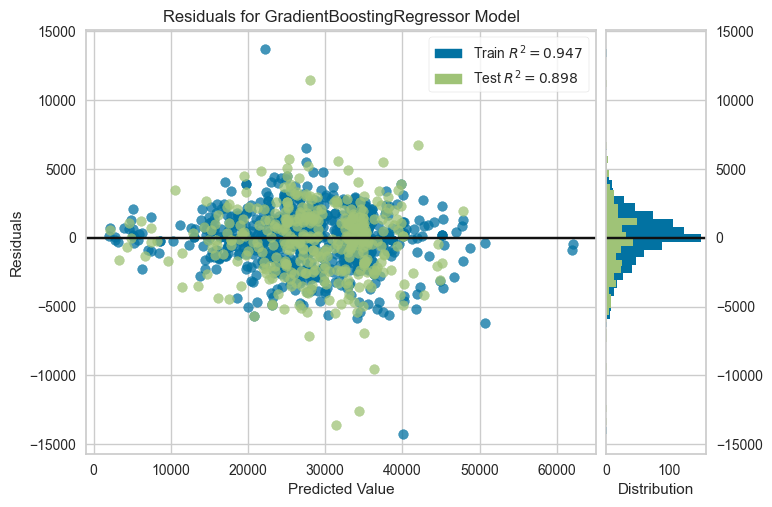

In [53]:
plot_model(best, plot='residuals')

#### Gráfico de error de predicción

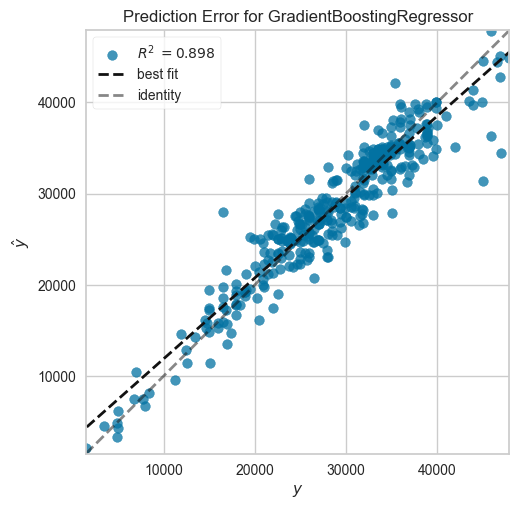

In [54]:
plot_model(best, plot='error')

#### Curva de aprendizaje

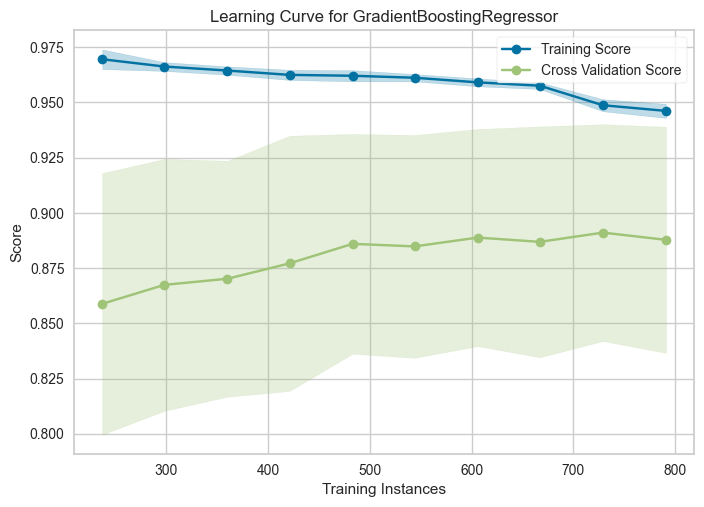

In [55]:
plot_model(best, plot='learning')

#### Importancia de características

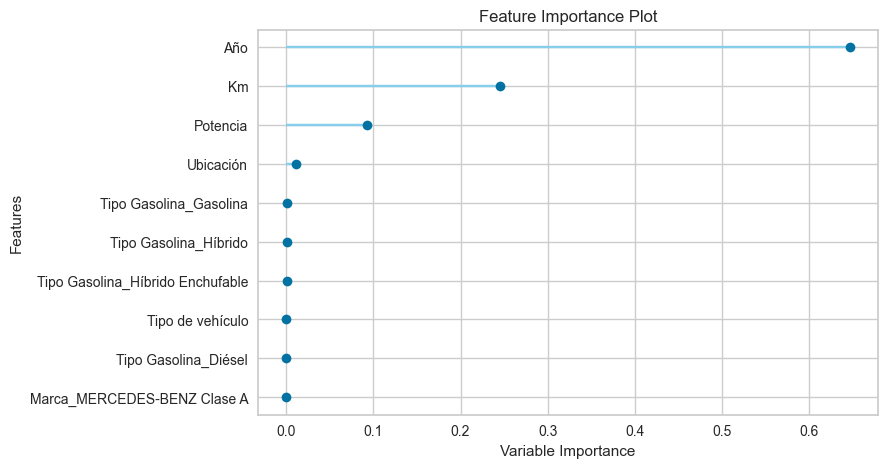

In [56]:
plot_model(best, plot='feature')

#### Visualización de parámetros

In [57]:
plot_model(best, plot='parameter')

,Parameters
alpha,0.9
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,squared_error
max_depth,3
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0


#### Curva de validación cruzada

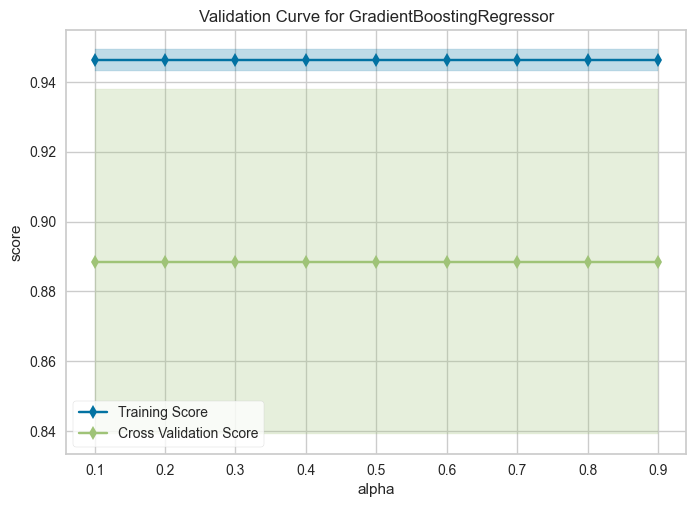

In [58]:
plot_model(best, plot='vc')

### Predicción

Cargamos dataset de prueba

In [59]:
df_test.head()

,Marca,Potencia,Tipo de vehículo,Año,Km,Tipo Gasolina,Ubicación,Precio
1196,MERCEDES-BENZ Clase A,200,NaN,2023,19189,Diésel,Cádiz,34900
626,MERCEDES-BENZ Clase A,180,Sedán,2023,16547,Híbrido,Sevilla,32490
941,MERCEDES-BENZ Clase A,250,NaN,2020,68937,Híbrido,Málaga,36990
1309,MERCEDES-BENZ Clase A,180,NaN,2019,68640,Diésel,Jaén,25900
259,MERCEDES-BENZ Clase A,180,Sedán,2020,148269,Diésel,Huesca,24490


In [60]:
predictions = predict_model(best, data = df_test)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1840.8823,6288023.9994,2507.5933,0.9145,0.0967,0.0704


,Marca,Potencia,Tipo de vehículo,Año,Km,Tipo Gasolina,Ubicación,Precio,prediction_label
1196,MERCEDES-BENZ Clase A,200,NaN,2023,19189,Diésel,Cádiz,34900,34971.869343
626,MERCEDES-BENZ Clase A,180,Sedán,2023,16547,Híbrido,Sevilla,32490,33082.857070
941,MERCEDES-BENZ Clase A,250,NaN,2020,68937,Híbrido,Málaga,36990,29703.270915
1309,MERCEDES-BENZ Clase A,180,NaN,2019,68640,Diésel,Jaén,25900,25290.784176
259,MERCEDES-BENZ Clase A,180,Sedán,2020,148269,Diésel,Huesca,24490,22645.788251


## Desision Tree Regression

### Train y test

In [45]:
from sklearn.model_selection import train_test_split

En test_size vamos a darle una dimensión del 20%. Procedemos entonces a dividir el dataset en train y test para comenzar a entrenarlo

In [46]:
df_train, df_test = train_test_split(df2, test_size=0.20, random_state=42)

In [47]:
X = df_train.drop('Precio', axis=1)
y = df_train['Precio']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

### Entrenamiento Caja Negra

In [49]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [18]:
from sklearn.metrics import mean_squared_error
import numpy as np

def calcular_rmse_train_val(clf, X_train, y_train, X_val, y_val):
    # Predecir en el conjunto de entrenamiento
    y_train_pred = clf.predict(X_train)
    # Calcular RMSE para el conjunto de entrenamiento
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    print("Entrenamiento RMSE:", rmse_train)

    # Predecir en el conjunto de validación
    y_val_pred = clf.predict(X_val)
    # Calcular RMSE para el conjunto de validación
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    print("Validación RMSE:", rmse_val)

    return rmse_train, rmse_val

### Validación

In [57]:
from sklearn.metrics import mean_squared_error

prediccion_train = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, prediccion_train))
print(f"Train Mean root mean squared error: {rmse}")

prediccion_test = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, prediccion_test))
print(f"Test Mean root mean squared error: {rmse}")

Train Mean root mean squared error: 3716.6119444374976
Test Mean root mean squared error: 3690.2035075354506


### Probamos con test

Guardamos el precio original de los coches en una columna precio para luego mostrar la comparación

In [51]:
precio_real_test = df_test["Precio"]
precio_real_test

1196    34900
626     32490
941     36990
1309    25900
259     24490
        ...  
277     28490
1221    32500
1079    15870
1552    25990
236     33500
Name: Precio, Length: 315, dtype: int64

Después de haber guardado los valores eliminamos la columna de test para predecir

In [52]:
df_test = df_test.drop("Precio", axis=1)
df_test

,Año,Km,Potencia_100,Potencia_102,Potencia_105,Potencia_108,Potencia_109,Potencia_110,Potencia_115,Potencia_116,...,Ubicación_Salamanca,Ubicación_Sevilla,Ubicación_Soria,Ubicación_Tarragona,Ubicación_Toledo,Ubicación_Valencia,Ubicación_Valladolid,Ubicación_Vizcaya,Ubicación_Zamora,Ubicación_Zaragoza
1196,2023,19189,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
626,2023,16547,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
941,2020,68937,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1309,2019,68640,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
259,2020,148269,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2016,74000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1221,2020,74000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1079,2017,135415,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1552,2021,73000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
prediccion = model.predict(df_test)

Después de predecir, mostramos en una tabla una comparación del precio real con la predicción para visualizar

In [56]:
df_resultado = pd.DataFrame({
    'Precio Real': precio_real_test,
    'Prediccion': prediccion
})

df_resultado.head(10)

,Precio Real,Prediccion
1196,34900,34089.478873
626,32490,34089.478873
941,36990,27332.666667
1309,25900,24266.089888
259,24490,24266.089888
1165,27991,27332.666667
32,26500,24266.089888
342,27900,24266.089888
1540,26695,27332.666667
588,34990,27332.666667


## Siguiente